In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cmscan_significant = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/6_infernal_cmscan/significant_cmscan.tabout', sep=' ')

In [6]:
cmscan_significant.rename(columns={'trinity':'ID'}, inplace=True)

In [7]:
cmscan_significant.head(1)

,name,id,ID
0,UnaL2,RF00436,TRINITY_DN100024_c5_g3_i1


In [3]:
#known_deseq = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_1d.csv')
#known_deseq = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_6d.csv')
known_deseq = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_9d.csv')

In [8]:
known_deseq.head(1)

,ID,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_9d_1,MC_9d_2,MC_9d_3,padj,log2FoldChange,pvalue,foldChange,log10padj
0,TRINITY_DN100025_c7_g1_i2,11738.30039,8027.482702,9359.312351,5458.076881,48.354393,41.723518,355.803655,9.717354e-09,-5.861818,4.267030e-10,0.017196,8.012452


In [9]:
merged = pd.merge(known_deseq, cmscan_significant, on='ID')

In [10]:
merged.drop_duplicates(inplace=True)

In [11]:
merged.head()

,ID,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_9d_1,MC_9d_2,MC_9d_3,padj,log2FoldChange,pvalue,foldChange,log10padj,name,id
0,TRINITY_DN100025_c7_g1_i2,11738.300390,8027.482702,9359.312351,5458.076881,48.354393,41.723518,355.803655,9.717354e-09,-5.861818,4.267030e-10,0.017196,8.012452,mir-454,RF00746
1,TRINITY_DN100076_c2_g3_i1,420.618367,375.212528,566.391952,1090.435251,23.025901,17.136445,144.903908,5.811787e-04,-3.312340,9.890761e-05,0.100667,3.235690,MIR811,RF00882
3,TRINITY_DN100076_c2_g3_i1,420.618367,375.212528,566.391952,1090.435251,23.025901,17.136445,144.903908,5.811787e-04,-3.312340,9.890761e-05,0.100667,3.235690,MIR1122,RF00906
5,TRINITY_DN100077_c4_g2_i1,685.181223,699.937743,1448.704749,599.503363,58.332284,85.682225,208.747709,1.802335e-05,-2.867159,1.886133e-06,0.137056,4.744165,UnaL2,RF00436
6,TRINITY_DN100080_c8_g1_i2,10.972653,13.769267,18.879732,8.260873,48.354393,130.385994,79.625415,1.117375e-05,2.733832,1.095110e-06,6.652201,4.951801,mir-130,RF00258


In [12]:
merged.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_9d_with_names.csv', index=False)

## wykres wszystkich lncRNA na podstawie NormReadCounts po DSEQ

In [3]:
day_1 = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_1d_with_names.csv')
day_6 = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_6d_with_names.csv')
day_9 = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_9d_with_names.csv')

In [4]:
day_1.columns

Index(['ID', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_1d_1',
       'MC_1d_2', 'MC_1d_3', 'padj', 'log2FoldChange', 'pvalue', 'foldChange',
       'log10padj', 'name', 'id'],
      dtype='object')

In [5]:
day_1_chart = day_1[['name', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_1d_1', 'MC_1d_2', 'MC_1d_3']]
day_6_chart = day_6[['name', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_6d_1', 'MC_6d_2', 'MC_6d_3']]
day_9_chart = day_9[['name', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_9d_1', 'MC_9d_2', 'MC_9d_3']]

In [6]:
# rename coluns to match in every day
day_1_chart.rename(columns={'PBS_1d_1':'PBS_1d', 'PBS_1d_2':'PBS_1d', 'PBS_1d_3':'PBS_1d', 'PBS_1d_4':'PBS_1d', 'MC_1d_1':'MC_1d', 'MC_1d_2':'MC_1d', 'MC_1d_3':'MC_1d'}, inplace=True)
day_6_chart.rename(columns={'PBS_1d_1':'PBS_1d', 'PBS_1d_2':'PBS_1d', 'PBS_1d_3':'PBS_1d', 'PBS_1d_4':'PBS_1d', 'MC_6d_1':'MC_6d', 'MC_6d_2':'MC_6d', 'MC_6d_3':'MC_6d'}, inplace=True)
day_9_chart.rename(columns={'PBS_1d_1':'PBS_1d', 'PBS_1d_2':'PBS_1d', 'PBS_1d_3':'PBS_1d', 'PBS_1d_4':'PBS_1d' , 'MC_9d_1':'MC_9d', 'MC_9d_2':'MC_9d', 'MC_9d_3':'MC_9d'}, inplace=True)

/home/maciek/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [7]:
day_1_chart_melted = pd.melt(day_1_chart, id_vars=['name'], var_name='group')
day_6_chart_melted = pd.melt(day_6_chart, id_vars=['name'], var_name='group')
day_9_chart_melted = pd.melt(day_9_chart, id_vars=['name'], var_name='group')


In [8]:
day_1_6_chart_melted = day_1_chart_melted.append(day_6_chart_melted)
day_1_6_9_chart_melted = day_1_6_chart_melted.append(day_9_chart_melted)

In [10]:
day_1_6_9_chart_melted.head()

,name,group,value
0,MIR811,PBS_1d,337.753268
1,MIR1122,PBS_1d,337.753268
2,UnaL2,PBS_1d,113.563418
3,SNORD100,PBS_1d,59.718694
4,UnaL2,PBS_1d,481.665530


In [11]:
rfam_all_lnc = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/rfam_lncRNA_list.csv')

In [15]:
lnc_only = day_1_6_9_chart_melted[day_1_6_9_chart_melted['name'].isin(rfam_all_lnc['name'])]

In [113]:
#genes='JPX|HOTTIP'
#exclude = 'mir|rna|scar|sno|unal|srp|let|plant|fungi'

In [114]:
#specific_name = day_1_6_9_chart_melted[~day_1_6_9_chart_melted['name'].str.contains(exclude, case=False)]

In [115]:
#specific_name.shape

(5222, 3)

In [116]:
#specific_name['name'].unique()[0:5]

array(['STnc400', 'U3', 'ACEA_U3', 'KCNQ1OT1_2', 'Rev44'], dtype=object)

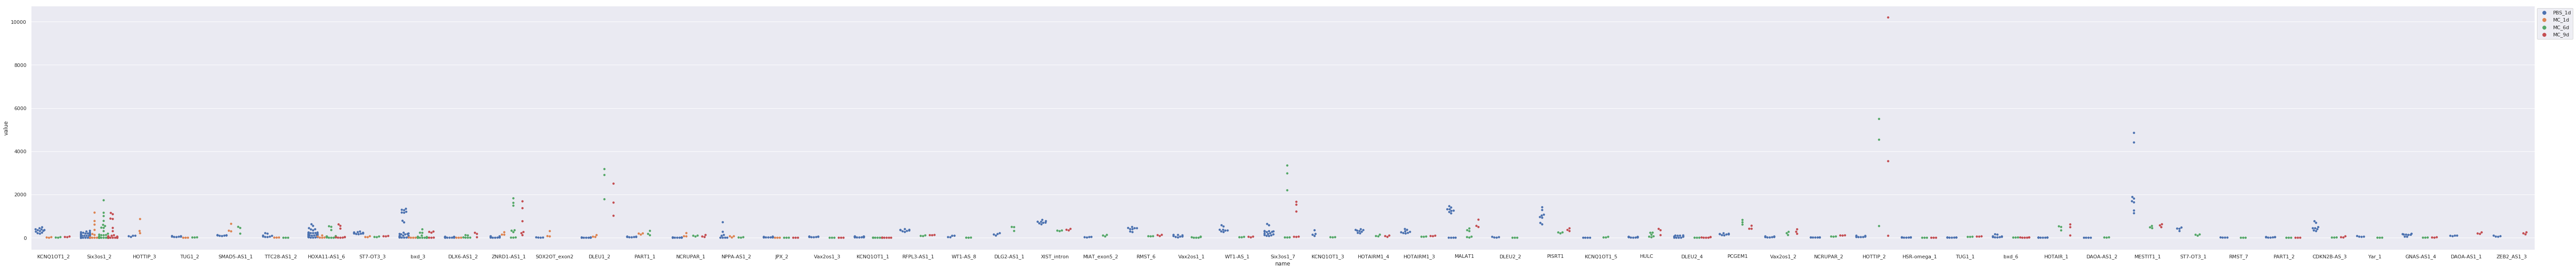

In [27]:
sns.set(rc={'figure.figsize':(100,10)})
sns.swarmplot(x='name', y='value', hue='group', data=lnc_only, dodge=True)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#plt.ylim(0, 1000)

## LISTA wszystkich znanych lncRNA na po DSEQ

In [2]:
day_1 = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_1d_with_names.csv')
day_6 = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_6d_with_names.csv')
day_9 = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_9d_with_names.csv')

In [3]:
day_1.columns

Index(['ID', 'PBS_1d_1', 'PBS_1d_2', 'PBS_1d_3', 'PBS_1d_4', 'MC_1d_1',
       'MC_1d_2', 'MC_1d_3', 'padj', 'log2FoldChange', 'pvalue', 'foldChange',
       'log10padj', 'name', 'id'],
      dtype='object')

In [3]:
rfam_all_lnc = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/rfam_lncRNA_list.csv')

In [4]:
day_1_lnc_only = day_1[day_1['name'].isin(rfam_all_lnc['name'])]
day_6_lnc_only = day_6[day_6['name'].isin(rfam_all_lnc['name'])]
day_9_lnc_only = day_9[day_9['name'].isin(rfam_all_lnc['name'])]

In [10]:
day_1_lnc_only.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_1d_with_names_lnc_only.csv', index=False)
day_6_lnc_only.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_6d_with_names_lnc_only.csv', index=False)
day_9_lnc_only.to_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_9d_with_names_lnc_only.csv', index=False)

In [5]:
day_1_lnc_only = day_1_lnc_only[['name', 'log2FoldChange']]
day_1_lnc_only.rename(columns={'log2FoldChange':'log2FC_1d'}, inplace=True)

day_6_lnc_only = day_6_lnc_only[['name', 'log2FoldChange']]
day_6_lnc_only.rename(columns={'log2FoldChange':'log2FC_6d'}, inplace=True)

day_9_lnc_only = day_9_lnc_only[['name', 'log2FoldChange']]
day_9_lnc_only.rename(columns={'log2FoldChange':'log2FC_9d'}, inplace=True)

day_1_lnc_only.head()

,name,log2FC_1d
53,KCNQ1OT1_2,-4.402864
149,Six3os1_2,-6.580705
157,HOTTIP_3,2.663142
250,Six3os1_2,-2.429397
279,TUG1_2,-6.246925


In [6]:
day_1_chart_melted = pd.melt(day_1_lnc_only, id_vars=['name'], var_name='group')
day_6_chart_melted = pd.melt(day_6_lnc_only, id_vars=['name'], var_name='group')
day_9_chart_melted = pd.melt(day_9_lnc_only, id_vars=['name'], var_name='group')

In [7]:
day_1_6_chart_melted = day_1_chart_melted.append(day_6_chart_melted)
day_1_6_9_chart_melted = day_1_6_chart_melted.append(day_9_chart_melted)

In [8]:
day_1_6_9_chart_melted

,name,group,value
0,KCNQ1OT1_2,log2FC_1d,-4.402864
1,Six3os1_2,log2FC_1d,-6.580705
2,HOTTIP_3,log2FC_1d,2.663142
3,Six3os1_2,log2FC_1d,-2.429397
4,TUG1_2,log2FC_1d,-6.246925
5,SMAD5-AS1_1,log2FC_1d,2.115878
6,TTC28-AS1_2,log2FC_1d,-3.419120
7,HOXA11-AS1_6,log2FC_1d,-3.778730
8,ST7-OT3_3,log2FC_1d,-2.127535
9,Six3os1_2,log2FC_1d,-2.008592


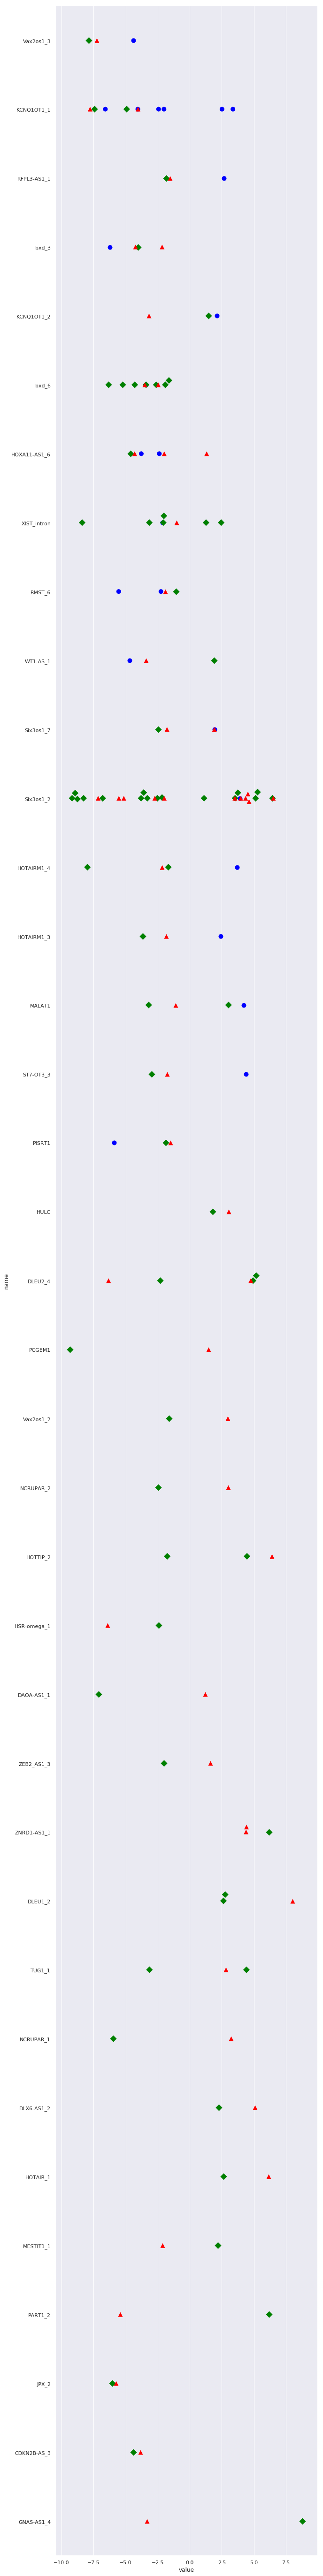

In [54]:
#sns.set(rc={'figure.figsize':(10,100)})
sns.swarmplot(y='name', x='value', color='blue', data=day_1_chart_melted, size=10)
sns.swarmplot(y='name', x='value', color='green', dodge=True, marker='D', data=day_6_chart_melted, size=10)
sns.swarmplot(y='name', x='value', color='red', marker='^', dodge=True, data=day_9_chart_melted, size=10)
#plt.scatter(day_1_6_9_chart_melted.group, day_1_6_9_chart_melted.value, c=np.random.random((len(day_1_6_9_chart_melted), 3)))

#plt.legend(bbox_to_anchor=(1, 1), loc=2)
#plt.ylim(0, 1000)

In [ ]:
tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", stat_func=None,
                  xlim=(0, 60), ylim=(0, 12))


g.ax_joint.cla() # or g.ax_joint.collections[0].set_visible(False), as per mwaskom's comment

# set the current axis to be the joint plot's axis
plt.sca(g.ax_joint)

# plt.scatter takes a 'c' keyword for color
# you can also pass an array of floats and use the 'cmap' keyword to
# convert them into a colormap
plt.scatter(tips.total_bill, tips.tip, c=np.random.random((len(tips), 3)))

In [3]:
day_1_lnc_only = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_1d_with_names_lnc_only.csv')
day_6_lnc_only = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_6d_with_names_lnc_only.csv')
day_9_lnc_only = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_known/up_down_known_DESEQ_9d_with_names_lnc_only.csv')

In [4]:
day_1_lnc_only.head()

,ID,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,padj,log2FoldChange,pvalue,foldChange,log10padj,name,id
0,TRINITY_DN105450_c0_g4_i1,309.362414,187.640144,281.594567,392.272092,13.312092,27.476768,0.000000,7.123849e-06,-4.402864,2.269814e-07,0.047272,5.147285,KCNQ1OT1_2,RF01947
1,TRINITY_DN69529_c0_g1_i1,23.495880,19.128364,63.682164,135.200575,0.000000,1.665259,0.000000,7.363374e-06,-6.580705,2.369689e-07,0.010447,5.132923,Six3os1_2,RF02247
2,TRINITY_DN77176_c0_g2_i1,93.004523,71.048210,91.543110,37.132552,210.945466,865.934496,312.526216,5.384898e-05,2.663142,2.265770e-06,6.334112,4.268823,HOTTIP_3,RF02042
3,TRINITY_DN86560_c9_g2_i3,64.613669,71.959084,91.543110,43.797369,17.408121,9.991552,10.534592,5.469524e-05,-2.429397,2.309716e-06,0.185643,4.262050,Six3os1_2,RF02247
4,TRINITY_DN88980_c18_g1_i3,46.991759,46.454599,30.846048,71.408755,0.000000,1.665259,0.000000,1.281560e-09,-6.246925,1.758372e-11,0.013167,8.892261,TUG1_2,RF01883


<Figure size 720x720 with 0 Axes>

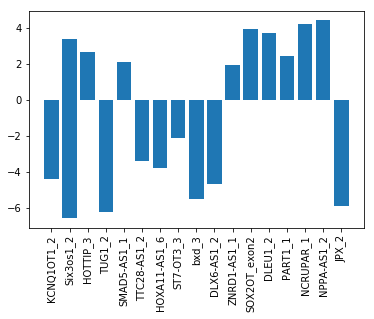

<Figure size 720x720 with 0 Axes>

In [22]:
plt.bar(day_1_lnc_only.name, day_1_lnc_only.log2FoldChange)
plt.xticks(rotation='vertical')
plt.figure(figsize=(10,10))

<Figure size 7200x7200 with 0 Axes>

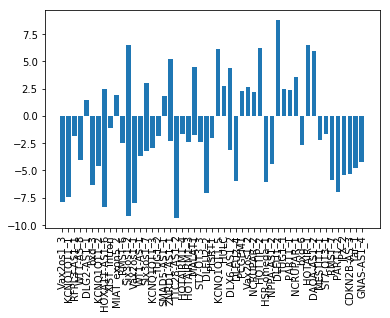

<Figure size 7200x7200 with 0 Axes>

In [25]:
plt.bar(day_6_lnc_only.name, day_6_lnc_only.log2FoldChange)
plt.xticks(rotation='vertical')
plt.figure(figsize=(100,100))

<Figure size 720x720 with 0 Axes>

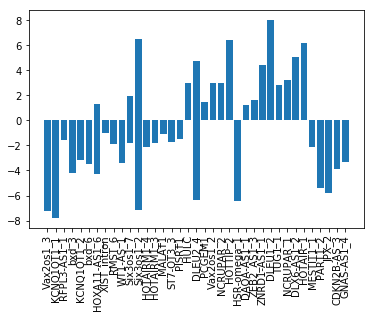

<Figure size 720x720 with 0 Axes>

In [24]:
plt.bar(day_9_lnc_only.name, day_9_lnc_only.log2FoldChange)
plt.xticks(rotation='vertical')
plt.figure(figsize=(10,10))